In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import folium

import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

idx = pd.IndexSlice

In [75]:
df = pd.read_csv('C:/pandasTest/data/crime_in_Seoul.csv', 
                encoding='euc-kr', thousands=',')
df

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861
5,용산서,5,5,14,14,194,173,1557,587,2050,1704
6,성북서,2,2,2,1,86,71,953,409,1194,1015
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227
8,마포서,8,8,14,10,294,247,2555,813,2983,2519
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961


crimeseoul.csv 파일을 이용 

1. 살인발생이 가장높은 관서명, 살인발생,살인검거를 출력하시오 

In [76]:
df[df['살인 발생'] == df['살인 발생'].max()][['관서명','살인 발생','살인 검거']]

,관서명,살인 발생,살인 검거
9,영등포서,14,12


2. 관서별 절도발생,절도검거에 대한 바차트를 그리시오

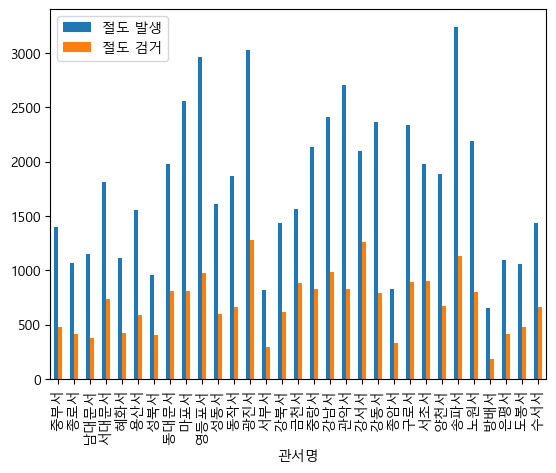

In [77]:
df.plot(kind='bar', x='관서명', y=['절도 발생','절도 검거'])
plt.show()

3. 절도검거율 컬럼을 추가 하시오.

In [78]:
df['절도검거율'] = (df['절도 검거']/df['절도 발생']*100).round(2)
df['절도검거율']

0     34.19
1     38.60
2     33.13
3     40.73
4     38.06
5     37.70
6     42.92
7     41.09
8     31.82
9     33.00
10    37.15
11    35.44
12    42.20
13    35.78
14    43.10
15    56.67
16    38.83
17    40.81
18    30.56
19    60.11
20    33.35
21    39.90
22    38.07
23    45.66
24    35.56
25    34.86
26    36.53
27    28.48
28    38.17
29    44.97
30    46.28
Name: 절도검거율, dtype: float64

In [79]:
df

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,절도검거율
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,34.19
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,38.60
2,남대문서,1,0,6,4,65,46,1153,382,869,794,33.13
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,40.73
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,38.06
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,37.70
6,성북서,2,2,2,1,86,71,953,409,1194,1015,42.92
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,41.09
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,31.82
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,33.00


4. 상관관계와  heatmap을 그리시오

In [80]:
df.iloc[:,1:].corr()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,절도검거율
살인 발생,1.000000,0.953920,0.640281,0.486899,0.621728,0.572858,0.662590,0.575135,0.754575,0.755763,-0.019899
살인 검거,0.953920,1.000000,0.648964,0.505346,0.575409,0.571278,0.653474,0.587725,0.802798,0.807260,0.014965
강도 발생,0.640281,0.648964,1.000000,0.866390,0.745120,0.798568,0.744599,0.702067,0.793311,0.801213,0.043142
강도 검거,0.486899,0.505346,0.866390,1.000000,0.604698,0.744171,0.710847,0.718638,0.696732,0.699700,0.115853
강간 발생,0.621728,0.575409,0.745120,0.604698,1.000000,0.915617,0.807301,0.781462,0.762625,0.756427,0.071127
강간 검거,0.572858,0.571278,0.798568,0.744171,0.915617,1.000000,0.838196,0.831827,0.800653,0.800535,0.120761
절도 발생,0.662590,0.653474,0.744599,0.710847,0.807301,0.838196,1.000000,0.888714,0.897244,0.889385,-0.084462
절도 검거,0.575135,0.587725,0.702067,0.718638,0.781462,0.831827,0.888714,1.000000,0.846821,0.852488,0.363145
폭력 발생,0.754575,0.802798,0.793311,0.696732,0.762625,0.800653,0.897244,0.846821,1.000000,0.997356,0.072000
폭력 검거,0.755763,0.807260,0.801213,0.699700,0.756427,0.800535,0.889385,0.852488,0.997356,1.000000,0.099228


In [81]:
import seaborn as sb

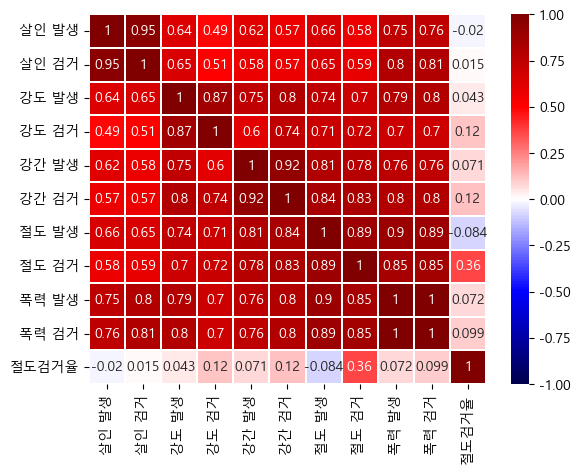

In [82]:
sb.heatmap(df.iloc[:,1:].corr(), vmin=-1, vmax=1, 
           annot=True, cmap='seismic', linewidths=0.2)
plt.show()

5. 폭력발생, 폭력검거의 scatter를 그리시오

In [83]:
df[['폭력 발생','폭력 검거']].head()

,폭력 발생,폭력 검거
0,1355,1170
1,1278,1070
2,869,794
3,2056,1711
4,1015,861


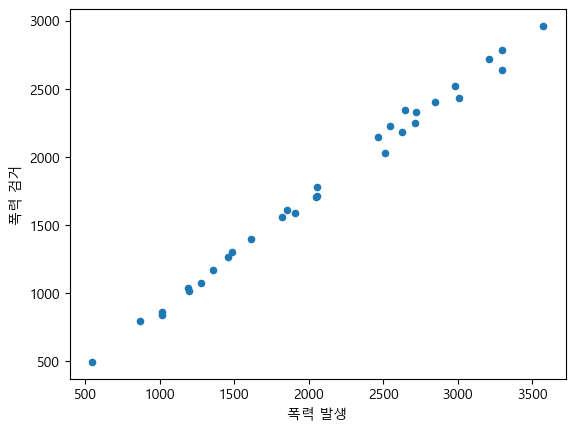

In [84]:
df.plot(kind='scatter', x='폭력 발생', y='폭력 검거')
plt.show()

In [85]:
df1 = pd.read_csv('C:/pandasTest/data/도로교통공단_전국_사망교통사고정보(2018).csv', encoding='euc-kr')
df1

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,가해자_당사자종별_대분류,가해자_당사자종별,피해자_당사자종별_대분류,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2018,2018021406,35,주,수,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,950497.0,1954702.0,126.939274,37.590388
1,2018,2018090205,23,야,일,1,1,0,0,0,...,교차로,교차로횡단보도내,승용차,승용차,보행자,보행자,953337.0,1950150.0,126.971732,37.549508
2,2018,2018121522,35,야,토,1,1,0,0,0,...,단일로,기타단일로,이륜차,이륜차,없음,없음,956967.0,1954807.0,127.012552,37.591659
3,2018,2018082311,30,주,목,1,1,0,0,0,...,단일로,기타단일로,승합차,승합차,없음,없음,958020.0,1959193.0,127.024227,37.631240
4,2018,2018071600,50,야,월,1,1,0,0,0,...,교차로,교차로횡단보도내,화물차,화물차,보행자,보행자,957606.0,1958258.0,127.019590,37.622794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3652,2018,2018052103,55,야,월,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,없음,없음,973070.0,1988564.0,127.193701,37.896529
3653,2018,2018060808,43,주,금,1,1,0,0,0,...,단일로,기타단일로,화물차,화물차,농기계,농기계,979900.0,2006212.0,127.270890,38.055765
3654,2018,2018012010,15,주,토,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,없음,없음,1001226.0,1959902.0,127.513896,37.638589
3655,2018,2018020321,5,야,토,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,1000491.0,1988419.0,127.505584,37.895621


도로교통공단_전국_사망교통사고정보(2018).csv

6. 부산에서 일어난 요일별 사망자수, 사상자수 를 출력하시오

In [86]:
busan = df1[df1['발생지시도'] == '부산']
busan

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,가해자_당사자종별_대분류,가해자_당사자종별,피해자_당사자종별_대분류,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
30,2018,2018081000,30,야,금,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,1141334.0,1682867.0,129.051251,35.131092
31,2018,2018082219,41,야,수,1,1,0,0,0,...,교차로,교차로횡단보도내,승용차,승용차,보행자,보행자,1145262.0,1689956.0,129.095597,35.194431
32,2018,2018100602,48,야,토,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,1143632.0,1690680.0,129.077825,35.201192
33,2018,2018101006,20,주,수,1,2,1,0,0,...,교차로,교차로부근,이륜차,이륜차,없음,없음,1142533.0,1678947.0,129.063732,35.095589
34,2018,2018041702,15,야,화,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,없음,없음,1152158.0,1688630.0,129.171072,35.181458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,2018,2018030806,30,주,목,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,1143957.0,1689244.0,129.081143,35.188201
3217,2018,2018052202,40,야,화,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,없음,없음,1127311.0,1683030.0,128.897406,35.134434
3218,2018,2018090515,14,주,수,1,1,0,0,0,...,교차로,교차로내,화물차,화물차,원동기장치자전거,원동기장치자전거,1131666.0,1691724.0,128.946582,35.212244
3219,2018,2018022218,43,야,목,1,6,1,4,0,...,교차로,교차로부근,이륜차,이륜차,화물차,화물차,1136104.4,1684881.2,128.994202,35.149970


In [87]:
busan.groupby('요일')[['사망자수','사상자수']].sum().loc[[ '월','화','수','목','금','토','일',]]

,사망자수,사상자수
요일,,
월,16,22
화,13,17
수,19,48
목,22,33
금,14,14
토,28,39
일,11,15


7. 부산 해운대구 지역의 교통사고 위치를 지도로 표시하고 각마커에는 법규위반내용을 표시하시오

In [88]:
Haeundae = df1[df1['발생지시군구'] == '해운대구'][['위도','경도','법규위반']]
m = folium.Map(location=[Haeundae['위도'].mean(),Haeundae['경도'].mean()],zoom_start=14)

for i,sr in Haeundae.iterrows():
    folium.Marker(location=[sr['위도'],sr['경도']], popup=['법규위반']).add_to(m)
m

8. 부산에서 발생한 총 사망자수를 구하시오

In [89]:
busan['사망자수'].sum()

np.int64(123)

9. 부산지역 월요일에 발생한 사상자수 사고유형 법규위반을 구하시오

In [90]:
busan[busan['요일']=='월'][['사상자수','사고유형','법규위반']]

,사상자수,사고유형,법규위반
37,1,횡단중,안전운전 의무 불이행
467,1,횡단중,안전운전 의무 불이행
468,1,기타,안전운전 의무 불이행
937,1,측면충돌,신호위반
944,1,측면충돌,안전거리 미확보
1391,1,차도통행중,과속
1392,3,측면충돌,중앙선 침범
1393,1,횡단중,과속
1816,2,공작물충돌,안전운전 의무 불이행
1821,1,횡단중,과속


10. 횡단중 일어난 사고의 요일 발생지시도, 법규위반, 피해자_당사자종별을 구하시오

In [91]:
df1[df1['사고유형']=='횡단중'][['요일','발생지시도','법규위반','피해자_당사자종별']]

,요일,발생지시도,법규위반,피해자_당사자종별
0,수,서울,안전운전 의무 불이행,보행자
1,일,서울,안전운전 의무 불이행,보행자
5,일,서울,안전운전 의무 불이행,보행자
6,월,서울,신호위반,보행자
7,금,서울,과속,보행자
...,...,...,...,...
3636,목,경기,보행자 보호의무 위반,보행자
3639,금,경기,신호위반,보행자
3643,토,경기,안전운전 의무 불이행,보행자
3646,화,경기,안전운전 의무 불이행,보행자


11. 사고유형별 비율을 파이차트로 그리시오.

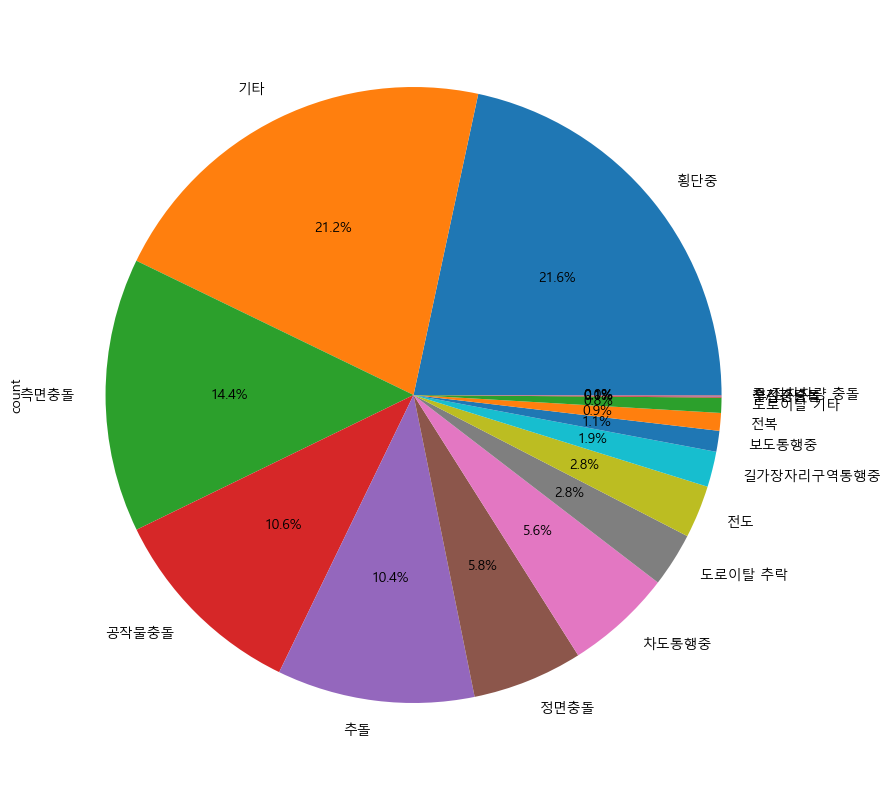

In [92]:
df1['사고유형'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,figsize=(10,10))
plt.show()

12.  사고월별 발생건수(발생분)를 구하시오.

In [93]:
df1['월'] = df1['발생년월일시'].astype(str).str[4:6]

In [94]:
df1.groupby('월')['발생분'].count()

월
01    297
02    267
03    295
04    292
05    290
06    255
07    305
08    348
09    339
10    363
11    292
12    314
Name: 발생분, dtype: int64

13. 시도별 사망건수 top5를 구하시오

In [95]:
df1.groupby('발생지시도')['사망자수'].sum().nlargest(5,keep='all')

발생지시도
경기    678
경북    409
충남    354
경남    333
전남    330
Name: 사망자수, dtype: int64

```text
14. 시간대별(0~23시) 사고 발생량 분석  
- 시간대별 발생건수(발생분)를 구하시오  
- 사고가 가장 많이 발생한 시간대를 구하시오.

In [96]:
df1['시간'] = df1['발생년월일시'].astype(str).str[-2:]

In [97]:
df1.groupby('시간')['발생분'].sum().nlargest(1, keep='all')

시간
19    5913
Name: 발생분, dtype: int64

In [98]:
df1

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,가해자_당사자종별_대분류,가해자_당사자종별,피해자_당사자종별_대분류,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,월,시간
0,2018,2018021406,35,주,수,1,1,0,0,0,...,승용차,승용차,보행자,보행자,950497.0,1954702.0,126.939274,37.590388,02,06
1,2018,2018090205,23,야,일,1,1,0,0,0,...,승용차,승용차,보행자,보행자,953337.0,1950150.0,126.971732,37.549508,09,05
2,2018,2018121522,35,야,토,1,1,0,0,0,...,이륜차,이륜차,없음,없음,956967.0,1954807.0,127.012552,37.591659,12,22
3,2018,2018082311,30,주,목,1,1,0,0,0,...,승합차,승합차,없음,없음,958020.0,1959193.0,127.024227,37.631240,08,11
4,2018,2018071600,50,야,월,1,1,0,0,0,...,화물차,화물차,보행자,보행자,957606.0,1958258.0,127.019590,37.622794,07,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3652,2018,2018052103,55,야,월,1,1,0,0,0,...,승용차,승용차,없음,없음,973070.0,1988564.0,127.193701,37.896529,05,03
3653,2018,2018060808,43,주,금,1,1,0,0,0,...,화물차,화물차,농기계,농기계,979900.0,2006212.0,127.270890,38.055765,06,08
3654,2018,2018012010,15,주,토,1,1,0,0,0,...,승용차,승용차,없음,없음,1001226.0,1959902.0,127.513896,37.638589,01,10
3655,2018,2018020321,5,야,토,1,1,0,0,0,...,승용차,승용차,승용차,승용차,1000491.0,1988419.0,127.505584,37.895621,02,21
